In [1]:
import numpy as np
import pandas as pd 

import os

In [2]:
df = pd.read_csv('/Users/localadmin/Desktop/bda datasets/cleaned_multiclass_dataset.csv')
df.head()

,cleaned_text,label
0,"['word', 'food', 'crapilicious']",0
1,['white'],0
2,"['classy', 'whore', 'red', 'velvet', 'cupcake']",0
3,"['meh', 'p', 'thanks', 'head', 'concerned', 'a...",0
4,"['isi', 'account', 'pretending', 'kurdish', 'a...",0


In [6]:
y=df['label']
y.shape

(47692,)

In [7]:
x=df['cleaned_text']
print(x.shape)

(47692,)


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
print('x train Shape: ',x_train.shape)
print('x test Shape: ',x_test.shape)
print('y train Shape: ',y_train.shape)
print('y test Shape: ',y_test.shape)

x train Shape:  (31953,)
x test Shape:  (15739,)
y train Shape:  (31953,)
y test Shape:  (15739,)


In [11]:
longest_sentence = max(x, key=lambda sentence: len(sentence.split()))
print('length of the longest sentence to estimate maximum words for cnn: ',len(longest_sentence))

length of the longest sentence to estimate maximum words for cnn:  4022


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=5000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(x_train)
sequence_train=tokenizer.texts_to_sequences(x_train)
sequence_test=tokenizer.texts_to_sequences(x_test)

2023-12-30 21:22:25.167138: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 35982 number of independent tokens


In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(31953, 314)

In [15]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(15739, 314)

In [16]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [17]:
# model = Sequential()
# D = 300
# model.add(Embedding(V+1,300,input_length=max_words))
# model.add(Conv1D(64,3,activation = 'relu'))
# model.add(Maxpooling1D(2,2))
# model.add(Conv1D(32,3,activation = 'relu'))
# model.add(Maxpooling1D(2,2))
# model.add(Dense(8, activation = 'relu'))
# model.add(Dense(6, activation = 'softmax'))
# model.compile(loss='binary_crossentropy', optimizer = 'adam',metrics=['accuracy'])
# print(model.summary())

In [18]:
D=2
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(6, activation = 'softmax')(x)
model=Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 314)]             0         
                                                                 
 embedding (Embedding)       (None, 314, 2)            71966     
                                                                 
 conv1d (Conv1D)             (None, 312, 32)           224       
                                                                 
 max_pooling1d (MaxPooling1  (None, 104, 32)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 102, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 34, 64)            0         
 g1D)                                                        

In [19]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=5,batch_size=100)

Epoch 1/5
320/320 [==============================] - 9s 25ms/step - loss: 1.0023 - accuracy: 0.5689 - val_loss: 0.5686 - val_accuracy: 0.7573
Epoch 2/5
320/320 [==============================] - 8s 26ms/step - loss: 0.4997 - accuracy: 0.7836 - val_loss: 0.5013 - val_accuracy: 0.7873
Epoch 3/5
320/320 [==============================] - 8s 25ms/step - loss: 0.4307 - accuracy: 0.8173 - val_loss: 0.4828 - val_accuracy: 0.7987
Epoch 4/5
320/320 [==============================] - 8s 25ms/step - loss: 0.3912 - accuracy: 0.8406 - val_loss: 0.4861 - val_accuracy: 0.7950
Epoch 5/5
320/320 [==============================] - 8s 25ms/step - loss: 0.3621 - accuracy: 0.8533 - val_loss: 0.5036 - val_accuracy: 0.8017


In [20]:
y_pred=model.predict(data_test)
y_pred

492/492 [==============================] - 1s 3ms/step


array([[3.5576029e-09, 1.7070841e-12, 9.1026271e-09, 1.9909467e-09,
        9.9999899e-01, 9.8223609e-07],
       [1.3211673e-01, 6.8680304e-03, 1.5923764e-04, 5.5820322e-01,
        1.5141077e-03, 3.0113852e-01],
       [4.5957030e-11, 2.0745048e-12, 6.1515404e-10, 2.8667266e-08,
        9.9999994e-01, 2.4287170e-08],
       ...,
       [2.2424772e-04, 9.9839753e-01, 4.7384430e-05, 1.2572508e-03,
        6.4150459e-05, 9.3593781e-06],
       [1.6808267e-04, 1.0627615e-06, 9.9969935e-01, 3.3746525e-07,
        1.7168728e-05, 1.1401278e-04],
       [1.7378421e-05, 8.1297521e-06, 7.0788913e-09, 9.9964249e-01,
        1.5434047e-05, 3.1646344e-04]], dtype=float32)

In [21]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([4, 3, 4, ..., 1, 2, 3])

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Text(50.722222222222214, 0.5, 'y_pred')

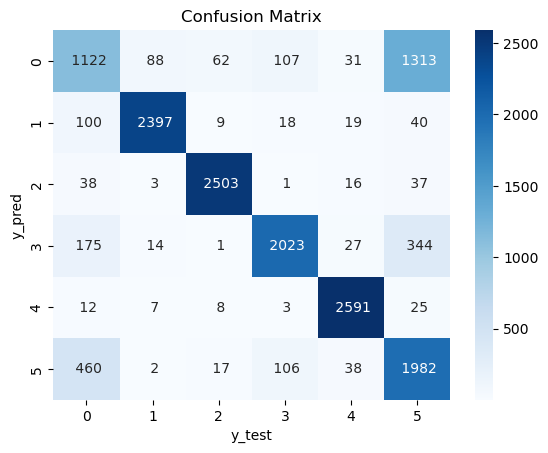

In [23]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.41      0.48      2723
           1       0.95      0.93      0.94      2583
           2       0.96      0.96      0.96      2598
           3       0.90      0.78      0.84      2584
           4       0.95      0.98      0.97      2646
           5       0.53      0.76      0.62      2605

    accuracy                           0.80     15739
   macro avg       0.81      0.80      0.80     15739
weighted avg       0.81      0.80      0.80     15739



In [54]:
model.save("cnn_senti.h5")

/Users/localadmin/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
